### 1. Look up SMOTE oversampling https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html .

**a. Describe what it is in your own words in markdown.**


  

SMOTE = synthetic minority oversampling technique

This is an oversampling technique to address imblanced datasets where we desire higher representation of the minority class. SMOTE is a method of producing synthetic data to then be used in modeling.

In SMOTE, a random example from the minority class is first selected. Then, k nearest neighbors are identified (usually ~5). From those selections of nearest neighbors, one is chosen at random. A line is drawn between these two examples from the minority class data. SMOTE then picks a random point along the line connecting the 2 examples and identifies that point as the new synthetic datapoint. All of this is completed in feature space. This process can be repeated until the desired number/proportion of synthetic datapoints are created. 

A benefit of this technique over naive random oversampling is that it creates realistic/plausible synthetic data rather than simply replicating existing data (it provides the model "new" information).

A downside of this technique is that the majority class is not considered at all. This can be a problem when values for the majority and minority case overlap. The synthetic data can then be ambiguous in terms of its assignment to the minority or majority class.

**b. Use this technique with the diabetes dataset. Comment on the model
performance compared to other methods.**

**The following naive oversampling is taken directly from our class notes and is included here for purpose of comparison.**

In [27]:
import numpy as np
import pandas as pd

diabetes_df = pd.read_csv('diabetes.csv')

In [28]:
#our previous model had a recall of .5
#Following code taken from in-class discussion/lecture
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Setting X and y values
X = diabetes_df.drop('Outcome',axis = 1)
y = diabetes_df['Outcome']

#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#Standardize
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

**Naive Oversampling**

In [29]:
#Resample the training data with RandomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaler, y_train)


In [30]:
#train using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

In [31]:
#calculate the accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaler)
balanced_accuracy_score(y_test, y_pred)
#increased accuracy from .6 to .74 by using oversampling

0.7403703703703703

<AxesSubplot:>

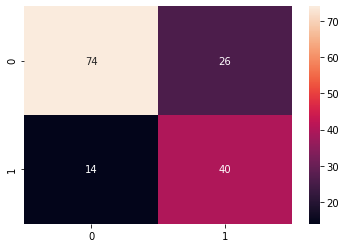

In [32]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cf_matrix_naive = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix_naive, annot=True)

In [33]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.74      0.74      0.79      0.74      0.55       100
          1       0.61      0.74      0.74      0.67      0.74      0.55        54

avg / total       0.76      0.74      0.74      0.74      0.74      0.55       154



**SMOTE**

balanced accuracy score (SMOTE): 0.7268518518518519
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.75      0.70      0.79      0.73      0.53       100
          1       0.60      0.70      0.75      0.65      0.73      0.53        54

avg / total       0.75      0.73      0.72      0.74      0.73      0.53       154



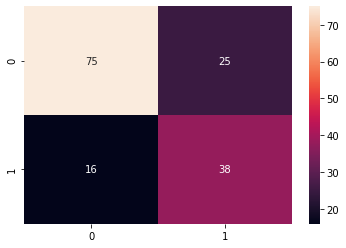

In [35]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 


#Train, test, split
X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
#Standardize
scs = StandardScaler()
X_train_scalers = sc.fit_transform(X_trains)
X_test_scalers = sc.fit_transform(X_tests)

sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_resampled_s, y_resampled_s = sm.fit_resample(X_train_scalers, y_trains)

model_s = LogisticRegression(random_state=42)
model_s.fit(X_resampled_s, y_resampled_s)

y_pred_s = model_s.predict(X_test_scalers)

bal_acc_SMOTE = balanced_accuracy_score(y_tests, y_pred_s)
print('balanced accuracy score (SMOTE):', bal_acc_SMOTE)

cf_matrix_smote = confusion_matrix(y_tests, y_pred_s)

cf_matrix_naive = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_smote, annot=True)

print(classification_report_imbalanced(y_tests, y_pred_s))


**Discussion**

Overall, the naive and SMOTE oversampling methods produced nearly identical results for this data. For naive oversmapling, avg. precision was 0.76, avg. recall was 0.74, and the avg. f1 score 0.74 with an accuracy score of 0.74. These values are just barely better than for the SMOTE method which produced avg. precision of 0.75, avg. recall of 0.73, avg. f1 score of 0.74, and accuracy of ~0.73. Both oversampling methods produce better results than multivariate logistic regression without oversampling. Which, in turn, produced better results tan univariate logistic regression or knn. 

**2. Create a list of preprocessing steps you should try when working to build a model. Work
with your group to come up with the most comprehensive list you can.**

-Remove extraneous spaces/formatting columns/rows/etc


-Remove null/NaN values


-remove redundant data (for example, a derived variable that uses one feature in its calculation)


-use correlation matrix to identify multicolinearity and remove appropriate features


-correct data types (including things like changing to datetime format)


-Normalize/standardize data


-encode categorical data into numeric data and other encoding (integer, one hot, etc)


-outlier detection and removal


-grouping or clustering data


-addition of new features from current features


-Principal components analysis


-visualizations to understand data and pick the most interesting/"best" features before modeling begins

